# Создание таймера, обработка датасета

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time 
from sklearn import metrics 
from sklearn import preprocessing

In [2]:
class Timer:
    def __init__(self):
        self._start_time = None
    def start(self):
        #Запуск нового таймера
        self._start_time = time.perf_counter()
    def stop(self):
        #Отстановить таймер 
        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Вычисление заняло {elapsed_time:0.4f} секунд")

In [3]:
t = Timer()

In [4]:
data=pd.read_csv('star_classification.csv')

In [5]:
data.head(4)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775


In [6]:
data.shape

(100000, 18)

In [7]:
data['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [8]:
pd.isnull(data).sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [11]:
import plotly.express as px
genre_counts = data['class'].value_counts().reset_index()
genre_counts.columns = ['class', 'Count']
fig = px.pie(genre_counts, names='class', values='Count', title='Классы объектов в %',color_discrete_sequence=px.colors.sequential.Magenta)
fig.show()

In [13]:
LE = preprocessing.LabelEncoder()
data['class'] = LE.fit_transform(data['class'])
data['class'].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

# Разделение данных на обучающие и тестирующие

In [14]:
x =  data.drop(['class','rerun_ID','obj_ID','run_ID','field_ID','spec_obj_ID','fiber_ID'], axis = 1)
y = data['class'].values

In [15]:
print(x)

            alpha      delta         u         g         r         i  \
0      135.689107  32.494632  23.87882  22.27530  20.39501  19.16573   
1      144.826101  31.274185  24.77759  22.83188  22.58444  21.16812   
2      142.188790  35.582444  25.26307  22.66389  20.60976  19.34857   
3      338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454   
4      345.282593  21.183866  19.43718  17.58028  16.49747  15.97711   
...           ...        ...       ...       ...       ...       ...   
99995   39.620709  -2.594074  22.16759  22.97586  21.90404  21.30548   
99996   29.493819  19.798874  22.69118  22.38628  20.45003  19.75759   
99997  224.587407  15.700707  21.16916  19.26997  18.20428  17.69034   
99998  212.268621  46.660365  25.35039  21.63757  19.91386  19.07254   
99999  196.896053  49.464643  22.62171  21.79745  20.60115  20.00959   

              z  cam_col  redshift  plate    MJD  
0      18.79371        2  0.634794   5812  56354  
1      21.61427        5  0.77913

In [16]:
print(y)

[0 0 0 ... 0 0 0]


In [17]:
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()
x = st_scaler.fit_transform(x)
print(x)

[[-0.43460358  0.42552871  0.0597546  ...  0.07955728  0.22863291
   0.42320321]
 [-0.33992143  0.36340227  0.08804527 ...  0.2770962   1.79792394
   1.42072864]
 [-0.36725058  0.58271274  0.10332677 ...  0.09242283 -0.19002535
   0.00185377]
 ...
 [ 0.48660555 -0.4293603  -0.02553763 ... -0.59298352 -0.80378648
  -0.58261651]
 [ 0.35895206  1.14663054  0.10607535 ... -0.16644396  0.54669125
   0.43094454]
 [ 0.19965373  1.28938133  0.02018443 ... -0.04614265  0.76990791
   0.83791722]]


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [19]:
print(x.shape, y.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(100000, 11) (100000,) (70000, 11) (70000,) (30000, 11) (30000,)


# Метод KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)

In [21]:
t.start()
knn.fit(x_train, y_train)
t.stop()

Вычисление заняло 0.0982 секунд


In [22]:
t.start()
y_pred=knn.predict(x_test)
t.stop()

Вычисление заняло 1.2559 секунд


In [23]:
from sklearn.metrics import accuracy_score
print('Точность: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print (metrics.classification_report(y_test, y_pred))

Точность:  92.98%
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     17809
           1       0.96      0.87      0.91      5641
           2       0.92      0.89      0.91      6550

    accuracy                           0.93     30000
   macro avg       0.94      0.91      0.92     30000
weighted avg       0.93      0.93      0.93     30000



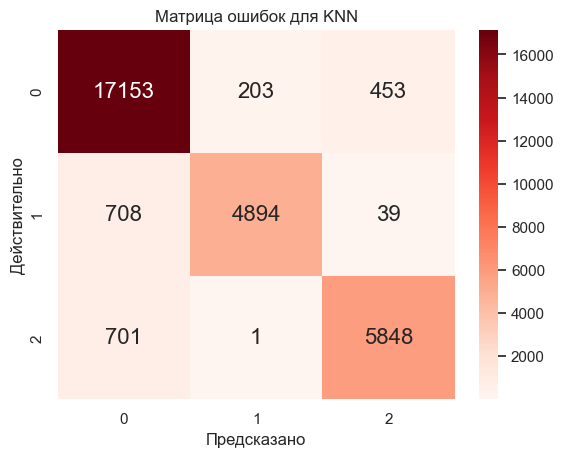

In [25]:
conf_matrix = sk.metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', fmt='g')

plt.xlabel('Предсказано')
plt.ylabel('Действительно')
plt.title('Матрица ошибок для KNN')
plt.show()

# Метод дерева решений

In [26]:
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier()

In [27]:
t.start()
dectree.fit(x_train,y_train)
t.stop()

Вычисление заняло 0.9376 секунд


In [28]:
t.start()
y_pred=dectree.predict(x_test)
t.stop()

Вычисление заняло 0.0042 секунд


In [29]:
from sklearn.metrics import accuracy_score
print('Точность: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print (metrics.classification_report(y_test, y_pred))

Точность:  96.47%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17809
           1       0.90      0.92      0.91      5641
           2       1.00      1.00      1.00      6550

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



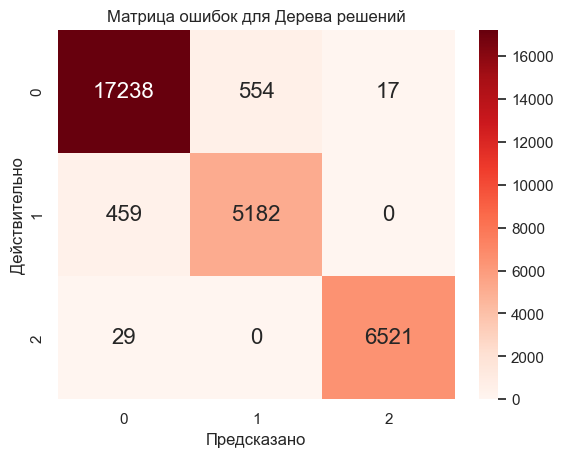

In [30]:
conf_matrix = sk.metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', fmt='g')

plt.xlabel('Предсказано')
plt.ylabel('Действительно')
plt.title('Матрица ошибок для Дерева решений')
plt.show()

# Нейронные сети

In [31]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [32]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [34]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(11,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [35]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=40,  #Остановка обучения модели, если точность не увеличится за 10 эпох.
                   restore_best_weights=True)

In [36]:
t.start()
NN_Classifier = model.fit(x_train, train_labels,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(x_test, test_labels))
t.stop()

Epoch 1/1000
70/70 - 1s - 20ms/step - accuracy: 0.8210 - loss: 0.4567 - val_accuracy: 0.9268 - val_loss: 0.2480
Epoch 2/1000
70/70 - 0s - 5ms/step - accuracy: 0.9272 - loss: 0.2193 - val_accuracy: 0.9486 - val_loss: 0.2099
Epoch 3/1000
70/70 - 0s - 5ms/step - accuracy: 0.9406 - loss: 0.1806 - val_accuracy: 0.9552 - val_loss: 0.1921
Epoch 4/1000
70/70 - 0s - 5ms/step - accuracy: 0.9478 - loss: 0.1638 - val_accuracy: 0.9586 - val_loss: 0.1865
Epoch 5/1000
70/70 - 0s - 5ms/step - accuracy: 0.9525 - loss: 0.1494 - val_accuracy: 0.9593 - val_loss: 0.1805
Epoch 6/1000
70/70 - 0s - 5ms/step - accuracy: 0.9560 - loss: 0.1409 - val_accuracy: 0.9612 - val_loss: 0.1865
Epoch 7/1000
70/70 - 0s - 5ms/step - accuracy: 0.9581 - loss: 0.1342 - val_accuracy: 0.9617 - val_loss: 0.1757
Epoch 8/1000
70/70 - 0s - 6ms/step - accuracy: 0.9598 - loss: 0.1311 - val_accuracy: 0.9648 - val_loss: 0.1824
Epoch 9/1000
70/70 - 0s - 5ms/step - accuracy: 0.9616 - loss: 0.1252 - val_accuracy: 0.9651 - val_loss: 0.1900


Epoch 75/1000
70/70 - 0s - 5ms/step - accuracy: 0.9732 - loss: 0.0878 - val_accuracy: 0.9720 - val_loss: 0.5678
Epoch 76/1000
70/70 - 0s - 5ms/step - accuracy: 0.9736 - loss: 0.0858 - val_accuracy: 0.9714 - val_loss: 0.5343
Epoch 77/1000
70/70 - 0s - 5ms/step - accuracy: 0.9733 - loss: 0.0861 - val_accuracy: 0.9710 - val_loss: 0.5377
Epoch 78/1000
70/70 - 0s - 5ms/step - accuracy: 0.9730 - loss: 0.0879 - val_accuracy: 0.9720 - val_loss: 0.5783
Epoch 79/1000
70/70 - 0s - 5ms/step - accuracy: 0.9737 - loss: 0.0863 - val_accuracy: 0.9718 - val_loss: 0.5820
Epoch 80/1000
70/70 - 0s - 5ms/step - accuracy: 0.9738 - loss: 0.0852 - val_accuracy: 0.9715 - val_loss: 0.4950
Epoch 81/1000
70/70 - 0s - 5ms/step - accuracy: 0.9736 - loss: 0.0848 - val_accuracy: 0.9717 - val_loss: 0.6187
Epoch 82/1000
70/70 - 0s - 5ms/step - accuracy: 0.9741 - loss: 0.0847 - val_accuracy: 0.9725 - val_loss: 0.6098
Epoch 83/1000
70/70 - 0s - 5ms/step - accuracy: 0.9738 - loss: 0.0850 - val_accuracy: 0.9673 - val_loss:

Epoch 148/1000
70/70 - 0s - 5ms/step - accuracy: 0.9757 - loss: 0.0765 - val_accuracy: 0.9709 - val_loss: 0.7492
Epoch 149/1000
70/70 - 0s - 5ms/step - accuracy: 0.9767 - loss: 0.0733 - val_accuracy: 0.9719 - val_loss: 1.0607
Epoch 150/1000
70/70 - 0s - 5ms/step - accuracy: 0.9769 - loss: 0.0722 - val_accuracy: 0.9727 - val_loss: 1.1425
Epoch 151/1000
70/70 - 0s - 5ms/step - accuracy: 0.9772 - loss: 0.0709 - val_accuracy: 0.9728 - val_loss: 1.1255
Epoch 152/1000
70/70 - 0s - 5ms/step - accuracy: 0.9774 - loss: 0.0706 - val_accuracy: 0.9718 - val_loss: 0.8415
Epoch 153/1000
70/70 - 0s - 5ms/step - accuracy: 0.9767 - loss: 0.0712 - val_accuracy: 0.9725 - val_loss: 1.1113
Epoch 154/1000
70/70 - 0s - 5ms/step - accuracy: 0.9769 - loss: 0.0721 - val_accuracy: 0.9720 - val_loss: 0.9010
Epoch 155/1000
70/70 - 0s - 5ms/step - accuracy: 0.9768 - loss: 0.0712 - val_accuracy: 0.9725 - val_loss: 1.1092
Epoch 156/1000
70/70 - 0s - 5ms/step - accuracy: 0.9773 - loss: 0.0716 - val_accuracy: 0.9722 - 

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
t.start()
y_pred=model.predict(x_test)
t.stop()
y_test_class = np.argmax(test_labels,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
print('Точность: ', '{:.2f}%'.format(accuracy_score(y_test_class, y_pred_class)*100))
print (metrics.classification_report(y_test_class, y_pred_class))

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step
Вычисление заняло 0.9469 секунд
Точность:  97.29%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17809
           1       0.96      0.93      0.95      5641
           2       0.97      1.00      0.98      6550

    accuracy                           0.97     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000



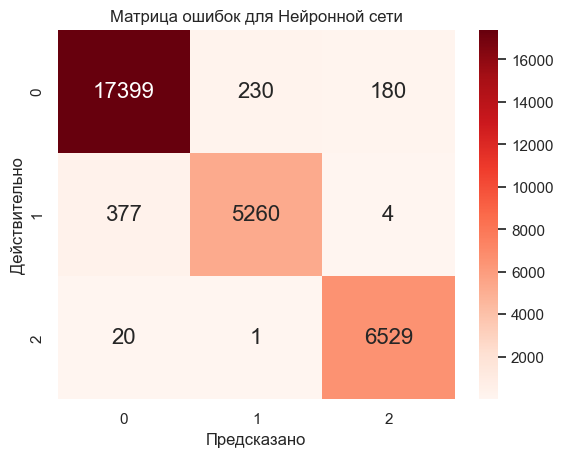

In [38]:
conf_matrix = sk.metrics.confusion_matrix(y_test_class, y_pred_class)
sns.set(font_scale=1)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', fmt='g')
plt.xlabel('Предсказано')
plt.ylabel('Действительно')
plt.title('Матрица ошибок для Нейронной сети')
plt.show()

# Поиск наилучших значений гиперпараметров при помощи Optuna

# KNN + Optuna

In [39]:
import optuna

In [40]:
def optuna_knn(trial):
    modelknn = KNeighborsClassifier(
        n_neighbors = trial.suggest_int('n_neighbors', 1, 25),
        weights = trial.suggest_categorical('weights', ['uniform', 'distance']),
        metric = trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski'])
    )
    t.start()
    modelknn.fit(x_train, y_train)
    t.stop()
    t.start()
    y_pred = modelknn.predict(x_test)
    t.stop()
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [41]:
study = optuna.create_study(study_name="KNN Optimization", direction='maximize')
study.optimize(optuna_knn, n_trials=50)
print('Количество завершенных испытаний:', len(study.trials))
print('Наилучшие значения гиперпараметров:', study.best_trial.params)
print('Точность на данном наборе: ' '{:.2f}%'.format(study.best_trial.value*100))

[I 2024-04-13 22:22:29,791] A new study created in memory with name: KNN Optimization


Вычисление заняло 0.0970 секунд


[I 2024-04-13 22:22:31,921] Trial 0 finished with value: 0.927 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 0 with value: 0.927.


Вычисление заняло 2.0332 секунд
Вычисление заняло 0.0994 секунд


[I 2024-04-13 22:22:32,962] Trial 1 finished with value: 0.9225666666666666 and parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.927.


Вычисление заняло 0.9398 секунд
Вычисление заняло 0.0992 секунд


[I 2024-04-13 22:22:35,018] Trial 2 finished with value: 0.9185333333333333 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 0 with value: 0.927.


Вычисление заняло 1.9518 секунд
Вычисление заняло 0.1010 секунд


[I 2024-04-13 22:22:36,707] Trial 3 finished with value: 0.9249666666666667 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 0 with value: 0.927.


Вычисление заняло 1.5847 секунд
Вычисление заняло 0.0966 секунд


[I 2024-04-13 22:22:38,495] Trial 4 finished with value: 0.9230333333333334 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 0 with value: 0.927.


Вычисление заняло 1.7033 секунд
Вычисление заняло 0.0946 секунд


[I 2024-04-13 22:22:40,884] Trial 5 finished with value: 0.9213 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.927.


Вычисление заняло 2.2859 секунд
Вычисление заняло 0.0911 секунд


[I 2024-04-13 22:22:42,166] Trial 6 finished with value: 0.9283666666666667 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 6 with value: 0.9283666666666667.


Вычисление заняло 1.1850 секунд
Вычисление заняло 0.0893 секунд


[I 2024-04-13 22:22:44,103] Trial 7 finished with value: 0.925 and parameters: {'n_neighbors': 12, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 6 with value: 0.9283666666666667.


Вычисление заняло 1.8499 секунд
Вычисление заняло 0.0907 секунд


[I 2024-04-13 22:22:46,385] Trial 8 finished with value: 0.9134 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 6 with value: 0.9283666666666667.


Вычисление заняло 2.1855 секунд
Вычисление заняло 0.0903 секунд


[I 2024-04-13 22:22:48,838] Trial 9 finished with value: 0.9103666666666667 and parameters: {'n_neighbors': 23, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 6 with value: 0.9283666666666667.


Вычисление заняло 2.3596 секунд
Вычисление заняло 0.0899 секунд


[I 2024-04-13 22:22:49,682] Trial 10 finished with value: 0.9306666666666666 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 10 with value: 0.9306666666666666.


Вычисление заняло 0.7456 секунд
Вычисление заняло 0.0901 секунд


[I 2024-04-13 22:22:50,635] Trial 11 finished with value: 0.9322666666666667 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 11 with value: 0.9322666666666667.


Вычисление заняло 0.8562 секунд
Вычисление заняло 0.0907 секунд


[I 2024-04-13 22:22:51,495] Trial 12 finished with value: 0.9306666666666666 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 11 with value: 0.9322666666666667.


Вычисление заняло 0.7663 секунд
Вычисление заняло 0.0893 секунд


[I 2024-04-13 22:22:52,639] Trial 13 finished with value: 0.9313666666666667 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 11 with value: 0.9322666666666667.


Вычисление заняло 1.0444 секунд
Вычисление заняло 0.0959 секунд


[I 2024-04-13 22:22:53,953] Trial 14 finished with value: 0.9287 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 11 with value: 0.9322666666666667.


Вычисление заняло 1.2185 секунд
Вычисление заняло 0.0982 секунд


[I 2024-04-13 22:22:55,234] Trial 15 finished with value: 0.9287 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 11 with value: 0.9322666666666667.


Вычисление заняло 1.1752 секунд
Вычисление заняло 0.0951 секунд


[I 2024-04-13 22:22:56,328] Trial 16 finished with value: 0.9306666666666666 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 11 with value: 0.9322666666666667.


Вычисление заняло 0.9908 секунд
Вычисление заняло 0.0941 секунд


[I 2024-04-13 22:22:57,797] Trial 17 finished with value: 0.9256333333333333 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 11 with value: 0.9322666666666667.


Вычисление заняло 1.3680 секунд
Вычисление заняло 0.0967 секунд


[I 2024-04-13 22:22:59,567] Trial 18 finished with value: 0.9218666666666666 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 11 with value: 0.9322666666666667.


Вычисление заняло 1.6633 секунд
Вычисление заняло 0.0936 секунд


[I 2024-04-13 22:23:00,563] Trial 19 finished with value: 0.9373666666666667 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.8953 секунд
Вычисление заняло 0.0999 секунд


[I 2024-04-13 22:23:01,222] Trial 20 finished with value: 0.9278333333333333 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.5528 секунд
Вычисление заняло 0.1064 секунд


[I 2024-04-13 22:23:02,337] Trial 21 finished with value: 0.9365666666666667 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.0015 секунд
Вычисление заняло 0.0922 секунд


[I 2024-04-13 22:23:03,222] Trial 22 finished with value: 0.9358333333333333 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.7872 секунд
Вычисление заняло 0.0941 секунд


[I 2024-04-13 22:23:04,678] Trial 23 finished with value: 0.9336333333333333 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.3538 секунд
Вычисление заняло 0.0956 секунд


[I 2024-04-13 22:23:05,462] Trial 24 finished with value: 0.9278333333333333 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.6824 секунд
Вычисление заняло 0.0924 секунд


[I 2024-04-13 22:23:06,663] Trial 25 finished with value: 0.9365666666666667 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.1019 секунд
Вычисление заняло 0.0921 секунд


[I 2024-04-13 22:23:08,269] Trial 26 finished with value: 0.9344666666666667 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.5099 секунд
Вычисление заняло 0.0967 секунд


[I 2024-04-13 22:23:09,713] Trial 27 finished with value: 0.9336333333333333 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.3507 секунд
Вычисление заняло 0.0957 секунд


[I 2024-04-13 22:23:10,963] Trial 28 finished with value: 0.9365 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.1348 секунд
Вычисление заняло 0.0937 секунд


[I 2024-04-13 22:23:12,660] Trial 29 finished with value: 0.9304333333333333 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.6074 секунд
Вычисление заняло 0.0914 секунд


[I 2024-04-13 22:23:13,632] Trial 30 finished with value: 0.9373666666666667 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.8653 секунд
Вычисление заняло 0.0924 секунд


[I 2024-04-13 22:23:14,707] Trial 31 finished with value: 0.9365666666666667 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.9735 секунд
Вычисление заняло 0.0923 секунд


[I 2024-04-13 22:23:15,270] Trial 32 finished with value: 0.9278333333333333 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.4682 секунд
Вычисление заняло 0.0892 секунд


[I 2024-04-13 22:23:16,245] Trial 33 finished with value: 0.9373666666666667 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.8734 секунд
Вычисление заняло 0.0914 секунд


[I 2024-04-13 22:23:17,120] Trial 34 finished with value: 0.9358333333333333 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.7852 секунд
Вычисление заняло 0.0905 секунд


[I 2024-04-13 22:23:18,316] Trial 35 finished with value: 0.9355 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.0959 секунд
Вычисление заняло 0.0908 секунд


[I 2024-04-13 22:23:20,844] Trial 36 finished with value: 0.9092 and parameters: {'n_neighbors': 25, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 2.4206 секунд
Вычисление заняло 0.0906 секунд


[I 2024-04-13 22:23:22,320] Trial 37 finished with value: 0.9326333333333333 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.3772 секунд
Вычисление заняло 0.0915 секунд


[I 2024-04-13 22:23:22,916] Trial 38 finished with value: 0.9278333333333333 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.5004 секунд
Вычисление заняло 0.0925 секунд


[I 2024-04-13 22:23:24,616] Trial 39 finished with value: 0.9191 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.5982 секунд
Вычисление заняло 0.0899 секунд


[I 2024-04-13 22:23:25,553] Trial 40 finished with value: 0.9373666666666667 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.8530 секунд
Вычисление заняло 0.0903 секунд


[I 2024-04-13 22:23:26,522] Trial 41 finished with value: 0.9373666666666667 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.8627 секунд
Вычисление заняло 0.0981 секунд


[I 2024-04-13 22:23:27,487] Trial 42 finished with value: 0.9373666666666667 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.8532 секунд
Вычисление заняло 0.0890 секунд


[I 2024-04-13 22:23:28,215] Trial 43 finished with value: 0.9278333333333333 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.6314 секунд
Вычисление заняло 0.0900 секунд


[I 2024-04-13 22:23:29,164] Trial 44 finished with value: 0.9373666666666667 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 0.8567 секунд
Вычисление заняло 0.0918 секунд


[I 2024-04-13 22:23:30,318] Trial 45 finished with value: 0.9199666666666667 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.0617 секунд
Вычисление заняло 0.0909 секунд


[I 2024-04-13 22:23:31,940] Trial 46 finished with value: 0.9311333333333334 and parameters: {'n_neighbors': 13, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.5147 секунд
Вычисление заняло 0.0915 секунд


[I 2024-04-13 22:23:33,056] Trial 47 finished with value: 0.9313666666666667 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.0227 секунд
Вычисление заняло 0.0898 секунд


[I 2024-04-13 22:23:34,902] Trial 48 finished with value: 0.9286666666666666 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.7383 секунд
Вычисление заняло 0.0908 секунд


[I 2024-04-13 22:23:36,251] Trial 49 finished with value: 0.9353 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 19 with value: 0.9373666666666667.


Вычисление заняло 1.2533 секунд
Количество завершенных испытаний: 50
Наилучшие значения гиперпараметров: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'manhattan'}
Точность на данном наборе: 93.74%


In [42]:
optuna.visualization.plot_optimization_history(study, target_name="Точность")

In [43]:
optuna.visualization.plot_param_importances(study)

# Decision Tree + Optuna

In [44]:
def optuna_dectree(trial):
    modeldt = DecisionTreeClassifier(
        max_depth = trial.suggest_int('max_depth', 5, x_train.shape[1]),
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20),
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    )
    t.start()
    modeldt.fit(x_train, y_train)
    t.stop()
    t.start()
    y_pred = modeldt.predict(x_test)
    t.stop()
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [45]:
study_dt = optuna.create_study(study_name="Decision Tree Optimization", direction='maximize')
study_dt.optimize(optuna_dectree, n_trials=50)
print('Количество завершенных испытаний:', len(study_dt.trials))
print('Наилучшие значения гиперпараметров:', study_dt.best_trial.params)
print('Точность на данном наборе: ' '{:.2f}%'.format(study_dt.best_trial.value*100))

[I 2024-04-13 22:24:44,401] A new study created in memory with name: Decision Tree Optimization
[I 2024-04-13 22:24:45,002] Trial 0 finished with value: 0.9753 and parameters: {'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.9753.


Вычисление заняло 0.5973 секунд
Вычисление заняло 0.0026 секунд


[I 2024-04-13 22:24:45,308] Trial 1 finished with value: 0.9664 and parameters: {'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.9753.


Вычисление заняло 0.3101 секунд
Вычисление заняло 0.0018 секунд


[I 2024-04-13 22:24:45,748] Trial 2 finished with value: 0.9743333333333334 and parameters: {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.9753.


Вычисление заняло 0.4323 секунд
Вычисление заняло 0.0021 секунд


[I 2024-04-13 22:24:46,182] Trial 3 finished with value: 0.9743 and parameters: {'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.9753.


Вычисление заняло 0.4232 секунд
Вычисление заняло 0.0021 секунд


[I 2024-04-13 22:24:46,501] Trial 4 finished with value: 0.9664 and parameters: {'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.9753.


Вычисление заняло 0.3157 секунд
Вычисление заняло 0.0019 секунд


[I 2024-04-13 22:24:47,041] Trial 5 finished with value: 0.9740333333333333 and parameters: {'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9753.


Вычисление заняло 0.5451 секунд
Вычисление заняло 0.0023 секунд


[I 2024-04-13 22:24:47,440] Trial 6 finished with value: 0.9686666666666667 and parameters: {'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.9753.


Вычисление заняло 0.3850 секунд
Вычисление заняло 0.0021 секунд


[I 2024-04-13 22:24:47,863] Trial 7 finished with value: 0.9743 and parameters: {'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.9753.


Вычисление заняло 0.4252 секунд
Вычисление заняло 0.0020 секунд


[I 2024-04-13 22:24:48,246] Trial 8 finished with value: 0.9686666666666667 and parameters: {'max_depth': 6, 'min_samples_split': 18, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.9753.


Вычисление заняло 0.3761 секунд
Вычисление заняло 0.0019 секунд


[I 2024-04-13 22:24:48,896] Trial 9 finished with value: 0.9755 and parameters: {'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 11}. Best is trial 9 with value: 0.9755.


Вычисление заняло 0.6398 секунд
Вычисление заняло 0.0028 секунд


[I 2024-04-13 22:24:49,564] Trial 10 finished with value: 0.9735333333333334 and parameters: {'max_depth': 11, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 9 with value: 0.9755.


Вычисление заняло 0.6546 секунд
Вычисление заняло 0.0027 секунд


[I 2024-04-13 22:24:50,218] Trial 11 finished with value: 0.9745333333333334 and parameters: {'max_depth': 11, 'min_samples_split': 20, 'min_samples_leaf': 7}. Best is trial 9 with value: 0.9755.


Вычисление заняло 0.6444 секунд
Вычисление заняло 0.0028 секунд


[I 2024-04-13 22:24:50,798] Trial 12 finished with value: 0.9753 and parameters: {'max_depth': 10, 'min_samples_split': 16, 'min_samples_leaf': 14}. Best is trial 9 with value: 0.9755.


Вычисление заняло 0.5680 секунд
Вычисление заняло 0.0024 секунд


[I 2024-04-13 22:24:51,334] Trial 13 finished with value: 0.9742 and parameters: {'max_depth': 9, 'min_samples_split': 14, 'min_samples_leaf': 8}. Best is trial 9 with value: 0.9755.


Вычисление заняло 0.5207 секунд
Вычисление заняло 0.0024 секунд


[I 2024-04-13 22:24:51,908] Trial 14 finished with value: 0.9751 and parameters: {'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 13}. Best is trial 9 with value: 0.9755.


Вычисление заняло 0.5643 секунд
Вычисление заняло 0.0024 секунд


[I 2024-04-13 22:24:52,538] Trial 15 finished with value: 0.9748666666666667 and parameters: {'max_depth': 10, 'min_samples_split': 17, 'min_samples_leaf': 9}. Best is trial 9 with value: 0.9755.


Вычисление заняло 0.6090 секунд
Вычисление заняло 0.0026 секунд


[I 2024-04-13 22:24:53,114] Trial 16 finished with value: 0.9741 and parameters: {'max_depth': 9, 'min_samples_split': 18, 'min_samples_leaf': 5}. Best is trial 9 with value: 0.9755.


Вычисление заняло 0.5621 секунд
Вычисление заняло 0.0024 секунд


[I 2024-04-13 22:24:53,762] Trial 17 finished with value: 0.9755 and parameters: {'max_depth': 11, 'min_samples_split': 14, 'min_samples_leaf': 15}. Best is trial 9 with value: 0.9755.


Вычисление заняло 0.6308 секунд
Вычисление заняло 0.0027 секунд


[I 2024-04-13 22:24:54,394] Trial 18 finished with value: 0.9755 and parameters: {'max_depth': 11, 'min_samples_split': 14, 'min_samples_leaf': 16}. Best is trial 9 with value: 0.9755.


Вычисление заняло 0.6147 секунд
Вычисление заняло 0.0029 секунд


[I 2024-04-13 22:24:54,906] Trial 19 finished with value: 0.9727666666666667 and parameters: {'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 15}. Best is trial 9 with value: 0.9755.


Вычисление заняло 0.5027 секунд
Вычисление заняло 0.0022 секунд


[I 2024-04-13 22:24:55,580] Trial 20 finished with value: 0.9745 and parameters: {'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 9 with value: 0.9755.


Вычисление заняло 0.6538 секунд
Вычисление заняло 0.0028 секунд


[I 2024-04-13 22:24:56,233] Trial 21 finished with value: 0.9755 and parameters: {'max_depth': 11, 'min_samples_split': 15, 'min_samples_leaf': 16}. Best is trial 9 with value: 0.9755.


Вычисление заняло 0.6374 секунд
Вычисление заняло 0.0027 секунд


[I 2024-04-13 22:24:56,844] Trial 22 finished with value: 0.9756 and parameters: {'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 20}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6095 секунд
Вычисление заняло 0.0025 секунд


[I 2024-04-13 22:24:57,450] Trial 23 finished with value: 0.975 and parameters: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.5831 секунд
Вычисление заняло 0.0025 секунд


[I 2024-04-13 22:24:58,087] Trial 24 finished with value: 0.9756 and parameters: {'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 19}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6198 секунд
Вычисление заняло 0.0026 секунд


[I 2024-04-13 22:24:58,636] Trial 25 finished with value: 0.975 and parameters: {'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 20}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.5299 секунд
Вычисление заняло 0.0024 секунд


[I 2024-04-13 22:24:59,238] Trial 26 finished with value: 0.9754 and parameters: {'max_depth': 10, 'min_samples_split': 16, 'min_samples_leaf': 20}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.5875 секунд
Вычисление заняло 0.0026 секунд


[I 2024-04-13 22:24:59,726] Trial 27 finished with value: 0.9728666666666667 and parameters: {'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 18}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.4725 секунд
Вычисление заняло 0.0022 секунд


[I 2024-04-13 22:25:00,366] Trial 28 finished with value: 0.9756 and parameters: {'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 20}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6246 секунд
Вычисление заняло 0.0027 секунд


[I 2024-04-13 22:25:00,938] Trial 29 finished with value: 0.9754 and parameters: {'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 20}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.5713 секунд
Вычисление заняло 0.0025 секунд


[I 2024-04-13 22:25:01,483] Trial 30 finished with value: 0.9750666666666666 and parameters: {'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 19}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.5258 секунд
Вычисление заняло 0.0024 секунд


[I 2024-04-13 22:25:02,119] Trial 31 finished with value: 0.9754 and parameters: {'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 17}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6111 секунд
Вычисление заняло 0.0031 секунд


[I 2024-04-13 22:25:02,766] Trial 32 finished with value: 0.9756 and parameters: {'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 19}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6385 секунд
Вычисление заняло 0.0027 секунд


[I 2024-04-13 22:25:03,355] Trial 33 finished with value: 0.9751 and parameters: {'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 17}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.5774 секунд
Вычисление заняло 0.0026 секунд


[I 2024-04-13 22:25:03,999] Trial 34 finished with value: 0.9756 and parameters: {'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 19}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6151 секунд
Вычисление заняло 0.0026 секунд


[I 2024-04-13 22:25:04,593] Trial 35 finished with value: 0.9749666666666666 and parameters: {'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 18}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.5769 секунд
Вычисление заняло 0.0025 секунд


[I 2024-04-13 22:25:05,213] Trial 36 finished with value: 0.9756 and parameters: {'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 20}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6081 секунд
Вычисление заняло 0.0026 секунд


[I 2024-04-13 22:25:05,804] Trial 37 finished with value: 0.9751 and parameters: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 16}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.5731 секунд
Вычисление заняло 0.0026 секунд


[I 2024-04-13 22:25:06,429] Trial 38 finished with value: 0.9751333333333333 and parameters: {'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 18}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6152 секунд
Вычисление заняло 0.0026 секунд


[I 2024-04-13 22:25:06,742] Trial 39 finished with value: 0.9664 and parameters: {'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 19}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.3026 секунд
Вычисление заняло 0.0018 секунд


[I 2024-04-13 22:25:07,379] Trial 40 finished with value: 0.9754 and parameters: {'max_depth': 11, 'min_samples_split': 15, 'min_samples_leaf': 17}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6087 секунд
Вычисление заняло 0.0027 секунд


[I 2024-04-13 22:25:08,011] Trial 41 finished with value: 0.9756 and parameters: {'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 19}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6177 секунд
Вычисление заняло 0.0029 секунд


[I 2024-04-13 22:25:08,623] Trial 42 finished with value: 0.9756 and parameters: {'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 19}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6025 секунд
Вычисление заняло 0.0026 секунд


[I 2024-04-13 22:25:09,261] Trial 43 finished with value: 0.9756 and parameters: {'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 20}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6180 секунд
Вычисление заняло 0.0026 секунд


[I 2024-04-13 22:25:09,842] Trial 44 finished with value: 0.9749 and parameters: {'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 18}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.5660 секунд
Вычисление заняло 0.0025 секунд


[I 2024-04-13 22:25:10,475] Trial 45 finished with value: 0.9756 and parameters: {'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 19}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6105 секунд
Вычисление заняло 0.0026 секунд


[I 2024-04-13 22:25:11,057] Trial 46 finished with value: 0.9751 and parameters: {'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 17}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.5678 секунд
Вычисление заняло 0.0025 секунд


[I 2024-04-13 22:25:11,479] Trial 47 finished with value: 0.9743 and parameters: {'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 13}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.4123 секунд
Вычисление заняло 0.0019 секунд


[I 2024-04-13 22:25:11,848] Trial 48 finished with value: 0.9686666666666667 and parameters: {'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 15}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.3577 секунд
Вычисление заняло 0.0019 секунд


[I 2024-04-13 22:25:12,483] Trial 49 finished with value: 0.9750666666666666 and parameters: {'max_depth': 11, 'min_samples_split': 14, 'min_samples_leaf': 18}. Best is trial 22 with value: 0.9756.


Вычисление заняло 0.6088 секунд
Вычисление заняло 0.0025 секунд
Количество завершенных испытаний: 50
Наилучшие значения гиперпараметров: {'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 20}
Точность на данном наборе: 97.56%


In [46]:
optuna.visualization.plot_param_importances(study_dt)

In [47]:
optuna.visualization.plot_optimization_history(study_dt, target_name="Точность")